In [1]:
using Pkg
Pkg.activate(".")
using Plots
include("kuramoto.jl")

  Activating project at `~/Documents/kuramoto`


transition (generic function with 3 methods)

In [2]:
n,d,T = 1000, 2.55, 100.
g = erdos_renyi(n, d/n)
C = connected_components(g)
c_size = [length(component) for component in C]
σ = sortperm(c_size, rev=true)
sorted_relative_sizes = c_size[σ]./n
@info "Connectivity threshold = {$(log(n))} ||  ζ(d) =$(ζ(d))" 
@show sorted_relative_sizes[1:3];

┌ Info: Connectivity threshold = {6.907755278982137} ||  ζ(d) =0.8989748614665574
└ @ Main /home/simon/Documents/kuramoto/kuramoto.ipynb:7


sorted_relative_sizes[1:3] = [0.919, 0.004, 0.004]


In [11]:
s = solve_kuramoto_on(g, T=T);
vertices_in_giant = sort(connected_components(g), by=size)[end]
gg = induced_subgraph(g, vertices_in_giant)[1]
ss = solve_kuramoto_on(gg, T=T);

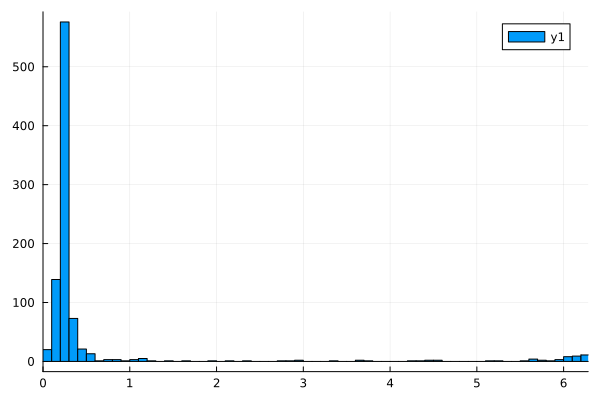

In [14]:
plot_histogram(s[end][vertices_in_giant])


In [18]:
size(ss[end])
#plot_histogram(ss[end])

(919,)

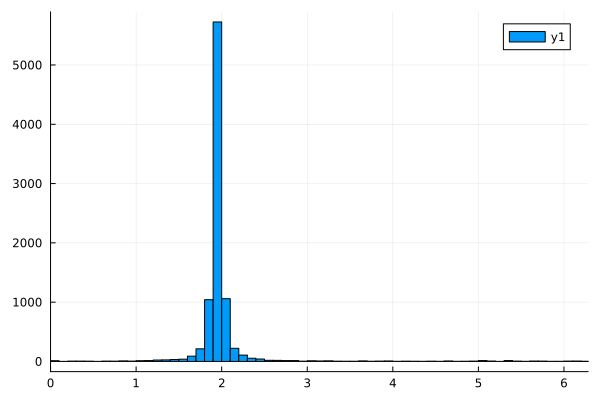

In [162]:
plot_histogram(mod2pi.(s[end])[C[σ[1]]])

In [163]:
function plot_daido(sol, components=C[σ], T=T, n=n)
    
    U = [ϱ(t,1) for t in sol.u]
    U_1 = [ϱ(t[components[1]],1) for t in sol.u]
    U_2 = [ϱ(t[components[2]],1) for t in sol.u]
    U_3 = [ϱ(t[components[3]],1) for t in sol.u]
    plot(sol.t, abs.(U), label="whole graph")
    plot!(sol.t, abs.(U_1), label="C1 (=giant)")
    plot!(sol.t, abs.(U_2), label="C2")
    plot!(sol.t, abs.(U_3), label="C3.")
    ylabel!("synchnonization index ϱ")
    xlabel!("time t")
    title!("ER(n=$n, d=$d), T = $T")
    hline!([size(components[1])[1]/n], color=:gray, linestyle=:dash, label = "p1 = |C1|/n")
end

plot_daido(s)
savefig("sync_$(d).png")

"/home/coste/Documents/kuramoto/sync_2.55.png"

In [22]:
include("kuramoto.jl")
n,T=1000,400
dmin,dmax, ϵ=2.0,3.0,0.1
D = transition(n, T; dmin=dmin, dmax=dmax, ϵ=ϵ)

0.0%┣                                               ┫ 0/11 [00:00<00:-1, -0s/it]


9.1%┣████                                       ┫ 1/11 [00:02<Inf:Inf, InfGs/it]


18.2%┣████████▌                                      ┫ 2/11 [00:03<00:23, 3s/it]


27.3%┣████████████▉                                  ┫ 3/11 [00:04<00:15, 2s/it]


36.4%┣█████████████████                              ┫ 4/11 [00:05<00:12, 2s/it]


45.5%┣█████████████████████▍                         ┫ 5/11 [00:06<00:09, 2s/it]


54.5%┣█████████████████████████▋                     ┫ 6/11 [00:08<00:08, 2s/it]


63.6%┣██████████████████████████████                 ┫ 7/11 [00:09<00:06, 2s/it]


72.7%┣██████████████████████████████████▏            ┫ 8/11 [00:10<00:04, 1s/it]


81.8%┣██████████████████████████████████████▌        ┫ 9/11 [00:12<00:03, 1s/it]


90.9%┣█████████████████████████████████████████▉    ┫ 10/11 [00:13<00:01, 1s/it]


100.0%┣█████████████████████████████████████████████┫ 11/11 [00:15<00:00, 1s/it]
100.0%┣█████████████████████████████████████████████┫ 11/11 [00:15<00:00, 1s/it]


Dict{Any, Any} with 11 entries:
  2.3 => ([0.0, 0.000509378, 0.00117228, 0.00215647, 0.00338827, 0.00493242, 0.…
  2.7 => ([0.0, 0.000447962, 0.000985418, 0.00180164, 0.00279776, 0.00404912, 0…
  2.2 => ([0.0, 0.00051448, 0.00121642, 0.00224458, 0.00354997, 0.00518341, 0.0…
  2.9 => ([0.0, 0.000484138, 0.00108934, 0.00199724, 0.00311842, 0.00452332, 0.…
  3.0 => ([0.0, 0.000474204, 0.00104478, 0.00190959, 0.00296454, 0.00428688, 0.…
  2.1 => ([0.0, 0.000528811, 0.00120664, 0.0022165, 0.00347342, 0.0050476, 0.00…
  2.8 => ([0.0, 0.000483757, 0.00109446, 0.00200789, 0.00313901, 0.00455535, 0.…
  2.4 => ([0.0, 0.000506406, 0.00115334, 0.00211823, 0.00331816, 0.00482155, 0.…
  2.0 => ([0.0, 0.000539433, 0.00125623, 0.00231356, 0.00364446, 0.00530988, 0.…
  2.6 => ([0.0, 0.000495853, 0.00111716, 0.00204858, 0.00319958, 0.00464168, 0.…
  2.5 => ([0.0, 0.000471378, 0.00107849, 0.00198165, 0.00310727, 0.00451647, 0.…

In [23]:

l = @layout [a{0.95w} b]
cmap = cgrad(:thermal)
p1 = plot(xlabel="time t", ylabel="|rho|")
for (d,v) in D
    plot!(p1, v[1],v[2], color=cmap[(d - dmin) / (dmax - dmin)], label=:none, lw=3, alpha=0.5)
end
p2 = heatmap(rand(2,2), clims=(dmin, dmax), framestyle=:none, c=cmap, cbar=true, lims=(-1,0))
title!(p1, "synchronization index on giant (n=$n)")
title!(p2, "d")
plot(p1, p2, layout=l)
savefig("save/transition_giant_$(n)_$T.png")


GKS: Rectangle definition is invalid in routine SET_VIEWPORT


"/home/simon/Documents/kuramoto/save/transition_giant_1000_400.png"

In [24]:
plot(xlabel="degree", ylabel="synchronization on giant at T=$T")
for (d,v) in D
    scatter!([d], [v[2][end]], color=cmap[(d-dmin)/(dmax-dmin)])
end
title!("n=$n, T=$T", legend=:none)
savefig("save/d_vs_syncr_$(n)_$T.png")

"/home/simon/Documents/kuramoto/save/d_vs_syncr_1000_400.png"

In [38]:
using BSON, Statistics
fname = "/home/simon/Documents/kuramoto/save/log/exp_T50_N4_n1000_dmax3.0_dmin2.0.bson"
fname2 = "/home/simon/Documents/kuramoto/save/log/exp_T200_N4_n2000_dmax3.0_dmin2.0.bson"
res = BSON.load(fname2)[:D]

Dict{Symbol, Any} with 3 entries:
  :result      => Dict{Any, Any}(2.05=>[0.0526636 0.0599736 … 0.727596 0.728519…
  :eval_times  => LinRange{Float64}(0.0, 50.0, 200)
  :degree_list => 2.0:0.05:3.0

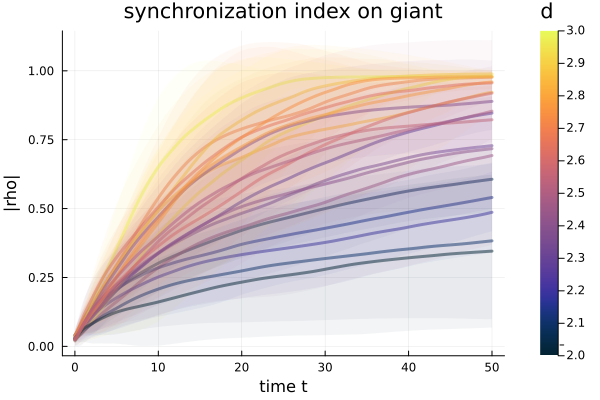

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [45]:
using Plots
l = @layout [a{0.95w} b]
cmap = cgrad(:thermal)
times = res[:eval_times]
dmin, dmax = minimum(res[:degree_list]), maximum(res[:degree_list])

p1 = plot(xlabel="time t", ylabel="|rho|")
for (d,v) in res[:result]
    # v is (N,N_eval)
    μ = mean(v, dims=1)[1,:]
    σ = std(v, dims=1)[1,:]
    
    plot!(p1, times, μ, ribbon = σ, color=cmap[(d - dmin) / (dmax - dmin)], label=:none, lw=3, alpha=0.6, fillalpha = 0.05)
end
p2 = heatmap(rand(2,2), clims=(dmin, dmax), framestyle=:none, c=cmap, cbar=true, lims=(-1,0))
title!(p1, "synchronization index on giant")
title!(p2, "d")
plot(p1, p2, layout=l)
#savefig("save/transition_giant_$(n)_$T.png")